In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.compose import ColumnTransformer
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor, plot_tree

from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# __FEATURE SELECTION__

## __A. Univariate Feature Selection__

__TABLE OF CONTENT__

1. data transform
1. feature selection : slect percentile
1. model fitting and evaluation : logistic regression

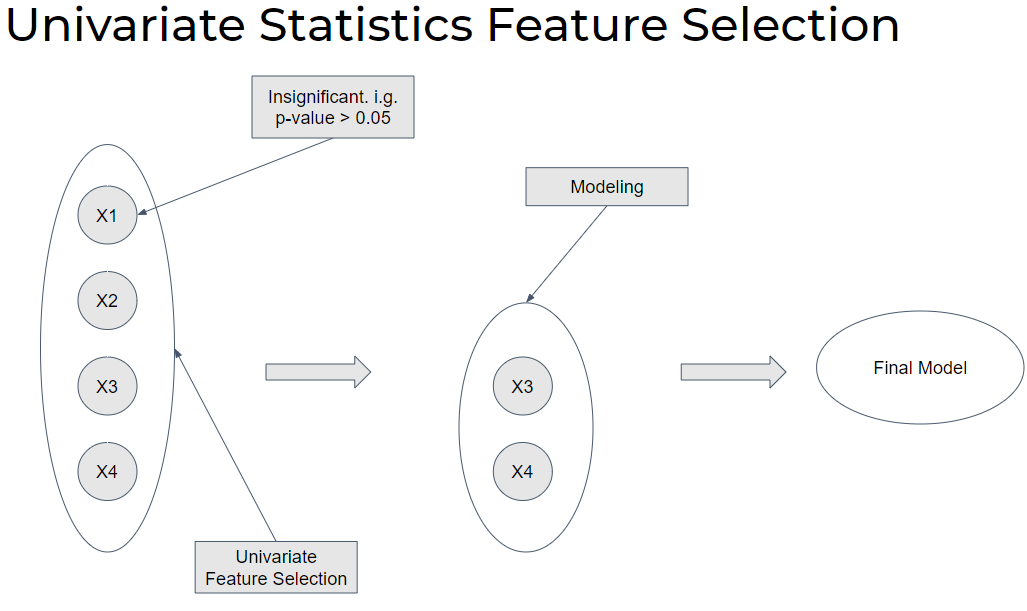

In [2]:
#1. Input dataset

adult = pd.read_csv('adult.csv')
adult.replace('?', np.nan, inplace=True) #ubah data '?' jadi nan

adult.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [3]:
#2. Membuat pipeline imputer dan encoder
binary_encoder_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value = 'NC')),
    ('binary', ce.BinaryEncoder())
])


#3. Membuat columnTransformer
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['relationship', 'race', 'sex']),
    ('binary_pipe', binary_encoder_pipeline, ['workclass', 'marital.status', 'occupation', 'native.country'])
], remainder='passthrough')

In [4]:
#4. Menentukan variabel dependent dan independent

X = adult.drop(columns = ['fnlwgt', 'income', 'education'], axis=1)
y = np.where(adult['income']=='>50K', 1, 0)

In [5]:
#5. Melakukan data splitting

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=10)

> ### __1. DATA TRANSFORM__

In [6]:
#1. Melakukan fitting ke xtrain dan xtest

X_train_preprocessed = transformer.fit_transform(X_train)
X_test_preprocessed = transformer.transform(X_test)

C:\Users\asus\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [7]:
#2. Dijadikan data frame dari hasil fitting

X_train_preprocessed = pd.DataFrame(X_train_preprocessed)
X_test_preprocessed = pd.DataFrame(X_test_preprocessed)

X_train_preprocessed.head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,20.0,10.0,0.0,0.0,10.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,20.0,9.0,0.0,0.0,55.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,47.0,16.0,15024.0,0.0,50.0
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,50.0,10.0,0.0,0.0,40.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,39.0,10.0,0.0,0.0,40.0


In [8]:
#3. Mendapatkan list feature name hasil data transformers

features = list(transformer.transformers_[0][1].get_feature_names()) + transformer.transformers_[1][1]['binary'].get_feature_names() + 'age education.num capital.gain capital.loss hours.per.week'.split()
display(len(features)) #jumlah features
display(features)

36

['x0_Not-in-family',
 'x0_Other-relative',
 'x0_Own-child',
 'x0_Unmarried',
 'x0_Wife',
 'x1_Asian-Pac-Islander',
 'x1_Black',
 'x1_Other',
 'x1_White',
 'x2_Male',
 '0_0',
 '0_1',
 '0_2',
 '0_3',
 '0_4',
 '1_0',
 '1_1',
 '1_2',
 '1_3',
 '2_0',
 '2_1',
 '2_2',
 '2_3',
 '2_4',
 '3_0',
 '3_1',
 '3_2',
 '3_3',
 '3_4',
 '3_5',
 '3_6',
 'age',
 'education.num',
 'capital.gain',
 'capital.loss',
 'hours.per.week']

> ### __2. FEATURE SELECTION__

In [9]:
#1. Melakukan feature selection

from sklearn.feature_selection import SelectPercentile

select = SelectPercentile(percentile=50) #menggunakan percentile 50 == mengambil 1/2 jumlah kolom
select.fit(X_train_preprocessed, y_train)

C:\Users\asus\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [10 15 19 24] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\asus\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


SelectPercentile(percentile=50)

In [10]:
#2. Mentransform hasil feature selection

X_train_selected = select.transform(X_train_preprocessed)
X_test_selected = select.transform(X_test_preprocessed)

In [11]:
#3. Membandingkan shape sebelum dan sesudah selection

print('before selection', X_train_preprocessed.shape)
print('after selection', X_train_selected.shape)

before selection (24420, 36)
after selection (24420, 18)


In [12]:
#4. Membuat boolean hasil ... untuk dimasukkan ke dataframe

mask = select.get_support()
mask

array([ True,  True,  True,  True,  True, False,  True, False,  True,
        True, False, False, False,  True, False, False,  True,  True,
        True, False, False, False, False,  True, False, False, False,
       False, False, False, False,  True,  True,  True,  True,  True])

In [13]:
#5. Membuat dataframe dari hasil 

selected_features = pd.DataFrame({
    'indicator': mask,
    'score': select.scores_,
    'features': features
})

selected_features

,indicator,score,features
0,True,886.311260,x0_Not-in-family
1,True,180.991858,x0_Other-relative
2,True,1347.522879,x0_Own-child
3,True,526.323271,x0_Unmarried
4,True,403.640797,x0_Wife
5,False,2.254091,x1_Asian-Pac-Islander
6,True,208.042370,x1_Black
7,False,23.274255,x1_Other
8,True,188.902365,x1_White
9,True,1170.742103,x2_Male


> ### __3. MODEL FITTING & EVALUATION__

In [19]:
#1. Melakukan model fitting dengan feature selection

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000, solver='liblinear', C=10)
model.fit(X_train_selected, y_train)

print('score', model.score(X_test_selected, y_test)) #sama kayak accuracy

score 0.8383490971625107


In [20]:
#accuracy score sama kayak model.score

                        #y_pred = model.predict(X_test_preprocessed)
accuracy_score(y_test, model.predict(X_test_selected))

0.8383490971625107

In [21]:
#2. Melakukan model fitting dengan tanpa feature selection

model2 = LogisticRegression(max_iter=1000, solver='liblinear', C=10)
model2.fit(X_train_preprocessed, y_train)

print('score2', model2.score(X_test_preprocessed, y_test))

score2 0.8398231175531261


__Notes:__
<br> Lebih bagus yg tanpa feature selection univariate, karena univariate tidak melihat korelasi antar variabel.

## __B. Recursive Feature Selection__

Feature selection dimana harus dibuat model terlebih dahulu.
<br> kita pake model2, dimana sudah dilakukan model fitting LogistisRegression

In [23]:
#1. Import Library

from sklearn.feature_selection import RFE

In [24]:
#2. Melakukan feature selection

selector = RFE(model2, n_features_to_select = 10, step=1)
selector.fit(X_train_preprocessed, y_train)
selector.support_

array([ True,  True,  True,  True,  True, False, False,  True, False,
        True, False,  True, False, False, False, False, False,  True,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False])

In [26]:
#3. Membuat dataframe dari hasil

rfe_df = pd.DataFrame({'indicator': selector.support_, 'features': X_train_preprocessed.columns})
rfe_df

,indicator,features
0,True,0
1,True,1
2,True,2
3,True,3
4,True,4
5,False,5
6,False,6
7,True,7
8,False,8
9,True,9


In [28]:
#4. Memilih yg true saja

selected = rfe_df[rfe_df['indicator'] == True]['features']
selected

0      0
1      1
2      2
3      3
4      4
7      7
9      9
11    11
17    17
25    25
Name: features, dtype: int64

In [29]:
#5. Lakukan modelling kembali dengan yg selected

model3 = LogisticRegression(max_iter=1000, solver='liblinear', C=10)
model3.fit(X_train_preprocessed[selected], y_train)

model3.score(X_test_preprocessed[selected], y_test)

0.7592433361994841

__Didapatkan model performance menjadi lebih jelek yaitu 75,9%__